In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import traceback
import sys
import os

In [37]:
data_path = os.path.join(os.path.abspath('..'), 'data', 'raw', 'credit_card_data.csv')
df = pd.read_csv(data_path)
df_copy = df.copy()

In [38]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [39]:
data = df.copy(deep=True)

In [40]:
categoricalCols = [col for col in data.columns if data[col].dtype== np.dtypes.ObjectDType]

In [41]:
#Convert "type" column from categorical -> numerical
LE = LabelEncoder()

for item in categoricalCols:
    data[item] = LE.fit_transform(data[item])


In [42]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [46]:
def evaluate_model(y_test, y_pred):
    print("accuracy_score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)

In [47]:
X = data.drop('isFraud', axis=1)
y = data.isFraud


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Unique predicted labels:  [0]
accuracy_score:  0.9986904765646856
Precision Score:  0.0
Recall Score:  0.0
F1 Score:  0.0
Confusion Matrix:  [[1588572       0]
 [   2083       0]]


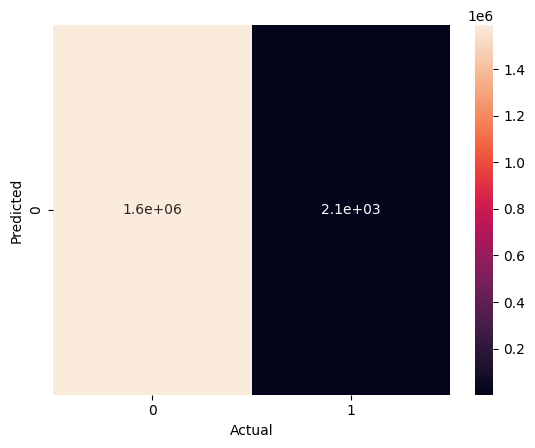

In [48]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
evaluate_model(y_test, dummy_pred)

Logistic Regression

In [49]:
# Modeling the data as is
# Train model
lr = LogisticRegression()
model1 = lr.fit(X_train, y_train)
 
# Predict on training set
lr_pred = model1.predict(X_test)

accuracy_score:  0.9983145308064917
Precision Score:  0.37436974789915967
Recall Score:  0.42774843975036003
F1 Score:  0.3992829935021286
Confusion Matrix:  [[1587083    1489]
 [   1192     891]]


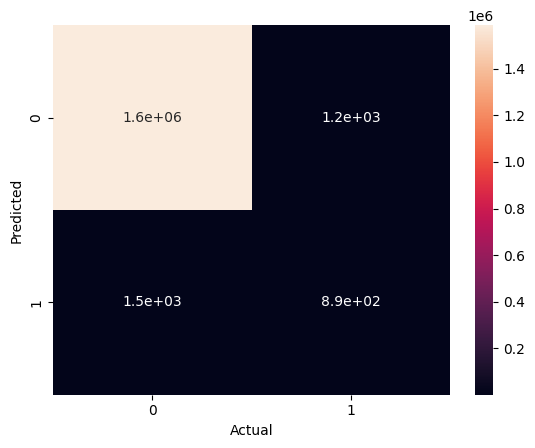

In [50]:
evaluate_model(y_test, lr_pred)

In [51]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0
0    1588275
1       2380
Name: count, dtype: int64

In [52]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,1587083,1489
1,1192,891


Random Forest Classifier

accuracy_score:  0.9996825207225954
Precision Score:  0.9758745476477684
Recall Score:  0.7767642822851656
F1 Score:  0.8650093557872227
Confusion Matrix:  [[1588532      40]
 [    465    1618]]


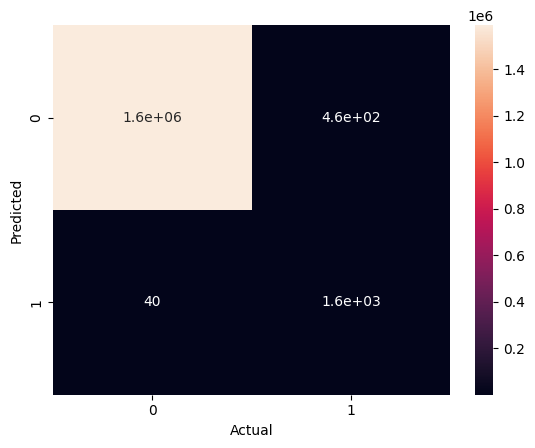

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

evaluate_model(y_test, rfc_pred)

In [54]:
# Checking unique values
predictions = pd.DataFrame(rfc_pred)
predictions[0].value_counts()

0
0    1588997
1       1658
Name: count, dtype: int64

In [55]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))


,0,1
0,1588532,40
1,465,1618


In [ ]:
import joblib
target_dest = '/Users/ericklopez/Desktop/ML_Powered_Credit_Card_Fraud_Detection_A_Docker_FastAPI_And_Streamlit_Approach/empirical/data/final/RandomForestClassifier.pkl'
joblib.dump(rfc,open(target_dest, 'wb'))